In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('credit-risk-dataset.csv')
df.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


In [3]:
df.shape

(5000, 21)

In [4]:
df.columns

Index(['CheckingStatus', 'LoanDuration', 'CreditHistory', 'LoanPurpose',
       'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone',
       'ForeignWorker', 'Risk'],
      dtype='object')

In [5]:
df['CheckingStatus'].value_counts()

CheckingStatus
no_checking    1993
less_0         1398
0_to_200       1304
greater_200     305
Name: count, dtype: int64

In [6]:
df['CreditHistory'].value_counts()

CreditHistory
prior_payments_delayed    1686
credits_paid_to_date      1490
outstanding_credit         938
all_credits_paid_back      769
no_credits                 117
Name: count, dtype: int64

In [7]:
df['ExistingSavings'].value_counts()

ExistingSavings
less_100        1856
100_to_500      1133
500_to_1000     1078
greater_1000     558
unknown          375
Name: count, dtype: int64

In [8]:
df['Housing'].value_counts()

Housing
own     3195
rent    1066
free     739
Name: count, dtype: int64

In [9]:
df['Job'].value_counts()

Job
skilled                     3400
unskilled                    673
management_self-employed     641
unemployed                   286
Name: count, dtype: int64

# Preprocessing features

Encode categorical data and turn them into numpy arrays

In [10]:
# Label encoding
encoder = preprocessing.LabelEncoder()
CheckingStatus_encoded = encoder.fit_transform(df['CheckingStatus']).reshape(-1, 1)
ExistingSavings_encoded = encoder.fit_transform(df['ExistingSavings']).reshape(-1,1)

# One hot encoding
encoder2 = OneHotEncoder()
CreditHistory_encoded = encoder2.fit_transform(df[['CreditHistory']]).toarray()
Housing_encoded = encoder2.fit_transform(df[['Housing']]).toarray()
Job_encoded = encoder2.fit_transform(df[['Job']]).toarray()


Turn quantitative data into numpy arrays

In [11]:
numerical_features = df[['LoanDuration','LoanAmount', 'Age']].values

Form X array

In [12]:
X = np.concatenate([CheckingStatus_encoded, CreditHistory_encoded, ExistingSavings_encoded, Housing_encoded, Job_encoded, numerical_features], axis=1)
print(type(X))

<class 'numpy.ndarray'>


In [13]:
# y array
y = encoder.fit_transform(df[['Risk']])
print(type(y))

<class 'numpy.ndarray'>


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Skip normalization because decision tree models can handle unscaled data well

# Modeling

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(f'Train set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Train set: (3500, 17), (3500,)
Test set: (1500, 17), (1500,)


In [15]:
creditTree = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
creditTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [16]:
creditTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Prediction

In [17]:
y_prediction = creditTree.predict(X_test)

In [18]:
print(y_prediction[0:5])
print(y_test[0:5])

[0 1 0 1 0]
[0 1 1 0 0]


# Model evaluation

In [19]:
print(f"Model accuracy: {metrics.accuracy_score(y_test, y_prediction)}")

Model accuracy: 0.7373333333333333


# Visualize the tree

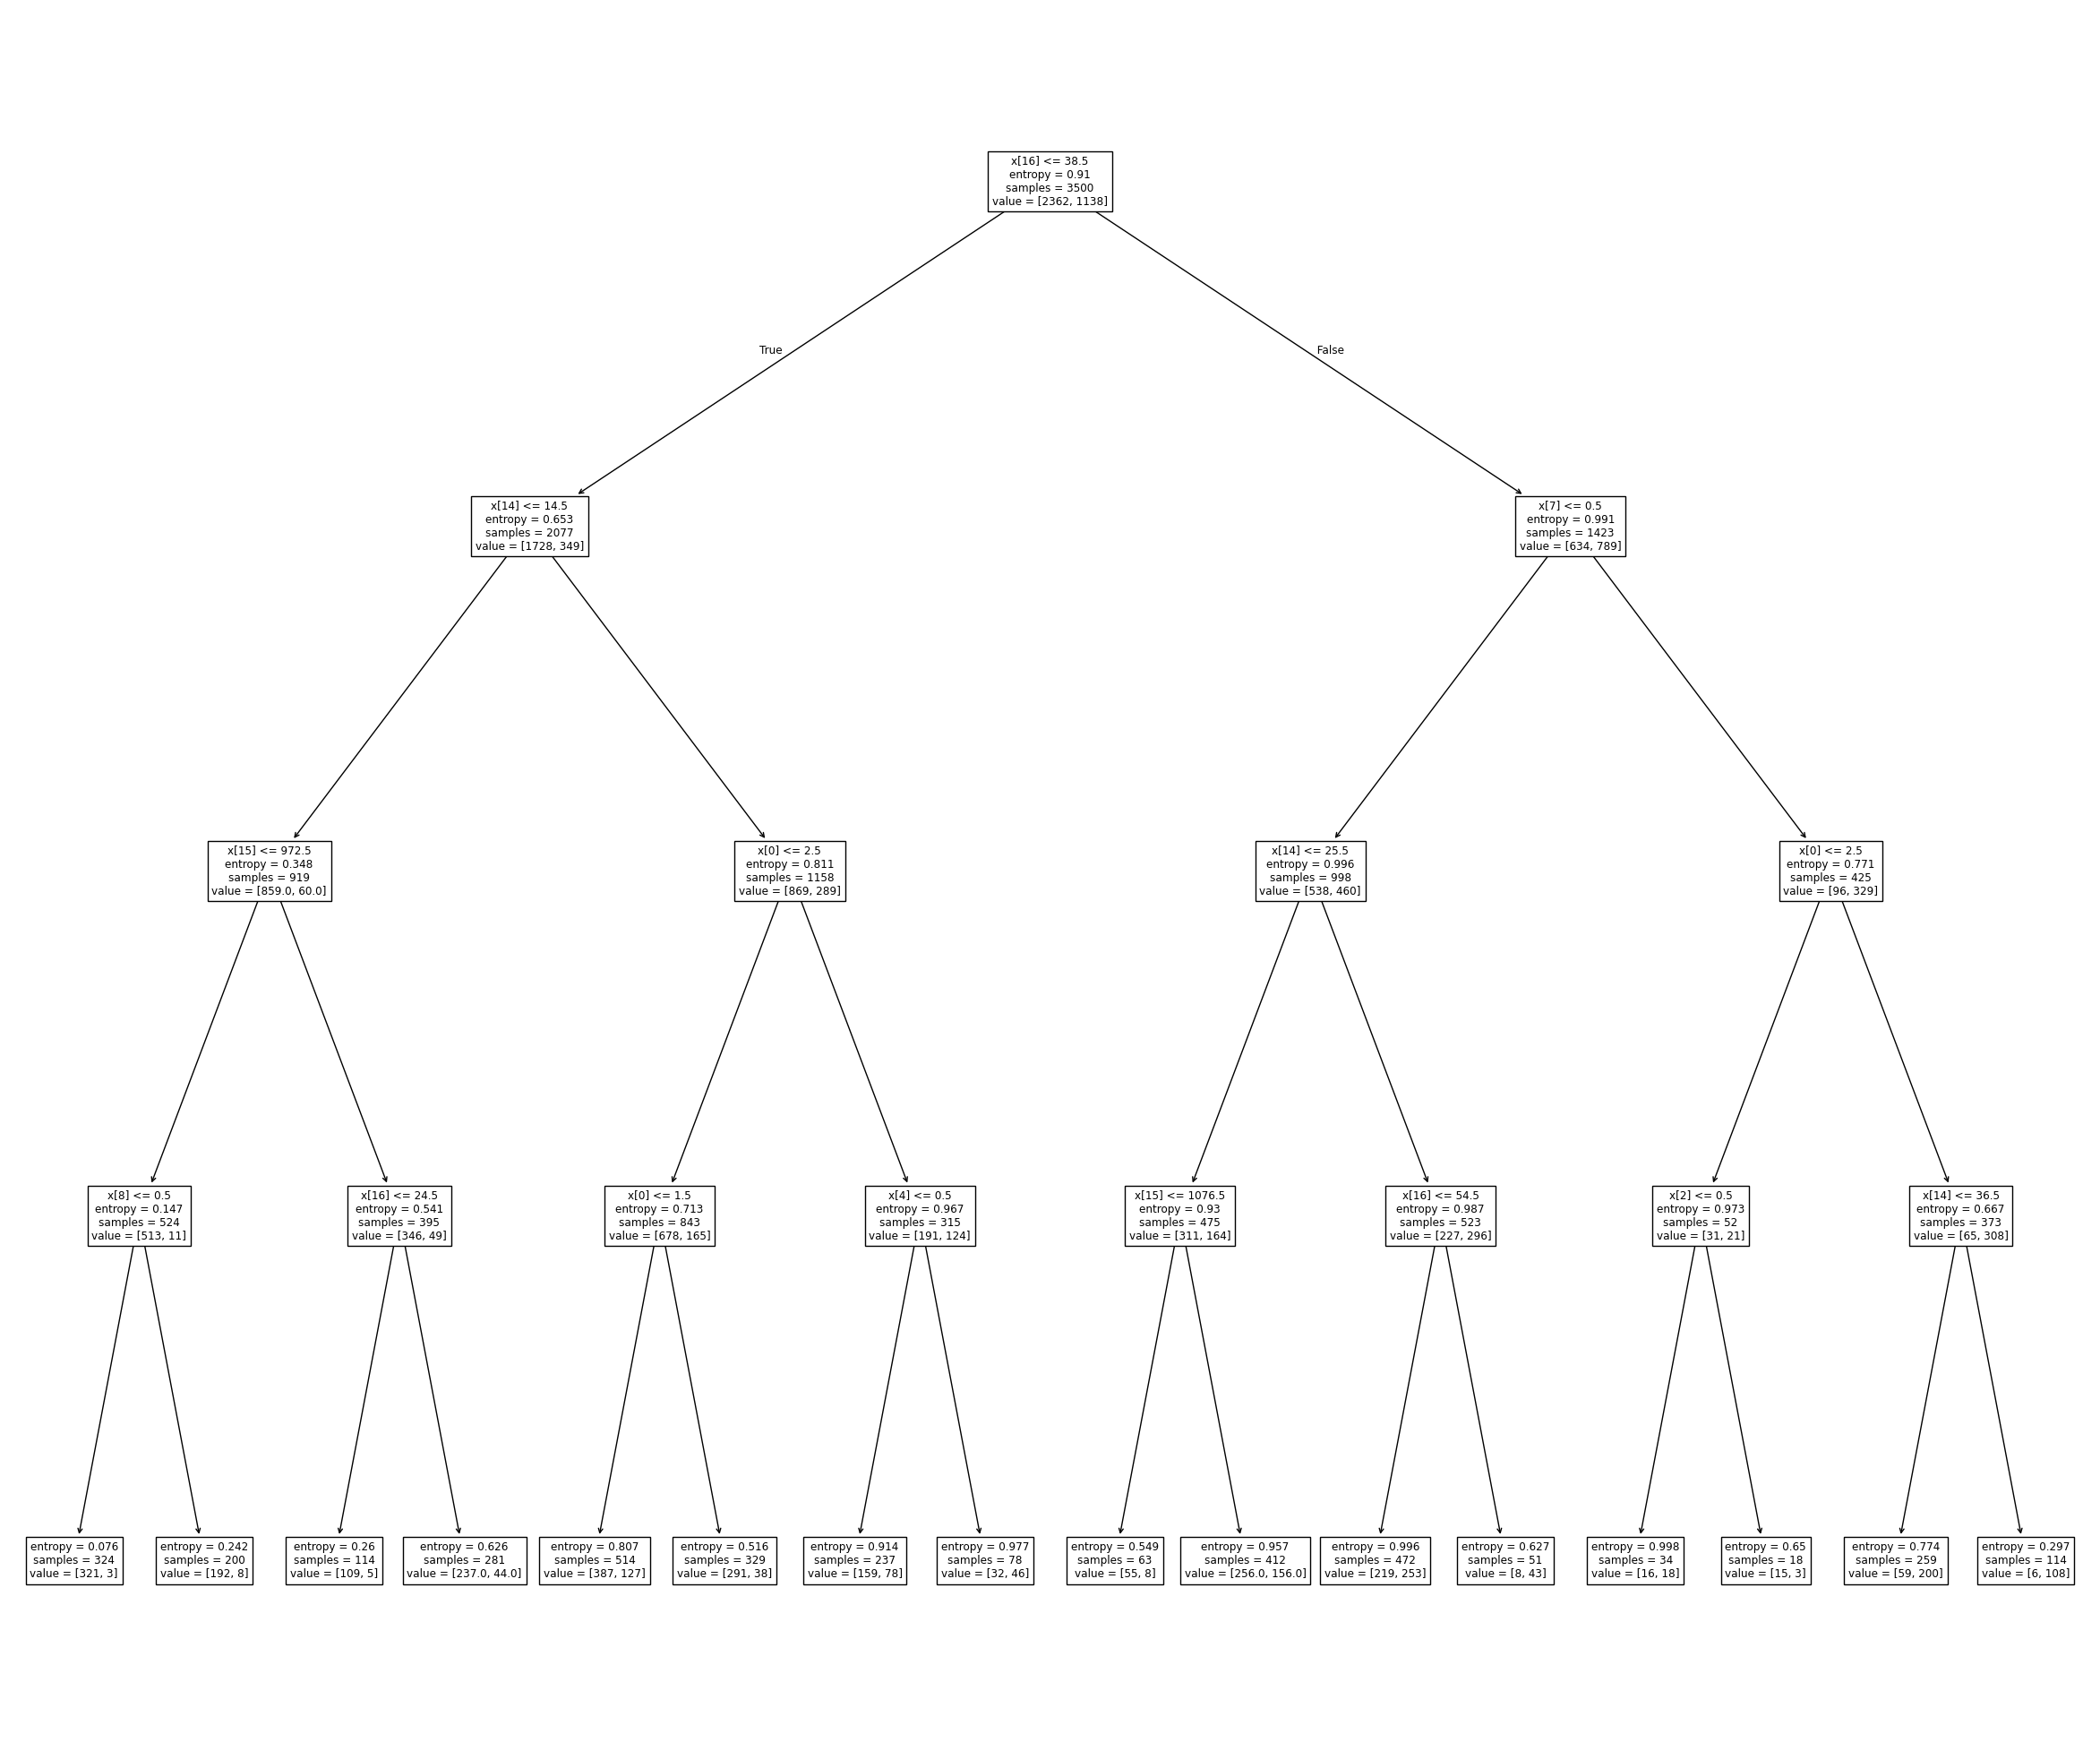

In [20]:
plt.figure(figsize=(30,25))
tree.plot_tree(creditTree)
plt.show()

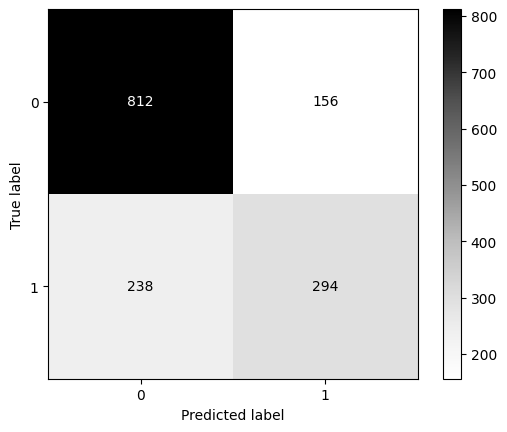

In [21]:
cm = confusion_matrix(y_test, y_prediction, labels = creditTree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = creditTree.classes_)
disp.plot(cmap = 'Greys')
plt.show()